In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# model imports
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

import pickle


In [ ]:
data = pd.read_csv("../measurements")
data = data.loc(axis=1)["Variety", "FreshWeightShoot", "DryWeightShoot", "Height", "Diameter", "LeafArea", "Week"]
data.head()

In [ ]:
def prepare_dataframe(df, variety="", dummy=True):

    if dummy:
        df    = pd.get_dummies(df, columns=['Variety'])
    else :
        df = df.loc[df["Variety"] == variety]
        df = df.loc(axis=1)["FreshWeightShoot", "DryWeightShoot", "Height", "Diameter", "LeafArea", "Week"]

    # remove string from week number
    df['Week'] = df['Week'].str.replace('2021-W', '')
    df['Week'] = pd.to_numeric(df["Week"])

    return df

In [ ]:
def split_data(df, test_size, shuffle):
    y = df["Week"].values
    X = df.drop(["Week"], axis=1).values


    return train_test_split(X, y, test_size=test_size, shuffle=shuffle, random_state=111)

In [ ]:
def create_fit_model(X_train, y_train):

    model = linear_model.LinearRegression()
    model = model.fit(X_train,y_train)
    return model


In [ ]:
def plot_true_vs_predicted(predicted, y, title):
    actual = y
    plt.plot(actual, 'bo')
    plt.plot(predicted, 'r^')

    # Draw lines between the data points
    for x1, y1, x2, y2 in zip(range(len(actual)), actual, range(len(predicted)), predicted):
        plt.plot([x1, x2], [y1, y2], 'k-')

    plt.title(title)
    plt.legend(['True data', 'Predicted data'])
    plt.show()


In [ ]:
def print_all_metrics(predictions, y_test):
    mse = mean_squared_error(predictions, y_test)
    mae = mean_absolute_error(predictions, y_test)

    print(f'mean squared error: {mse}')
    print(f'mean absolute erorr: {mae}')


In [ ]:
def evaluate_model(metrics, model, y_test, X_test, title):
    prediction = model.predict(X_test)
    print_all_metrics(prediction, y_test)
    plot_true_vs_predicted(prediction, y_test, title)


In [ ]:
df = prepare_dataframe(data, dummy=True)
X_train, X_test, y_train, y_test = split_data(df, 0.25, True)

model = create_fit_model(X_train, y_train)
evaluate_model([mean_squared_error, mean_absolute_error], model, y_test, X_test, "all varieties")

In [ ]:
filename = 'linear_model-all-varieties.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
varieties = ["Satine", "Salanova", "Aphylion", "Lugano" ]

for variety in varieties:
    df = prepare_dataframe(data, variety, False)
    X_train, X_test, y_train, y_test = split_data(df, 0.25, True)
    model = create_fit_model(X_train, y_train)
    evaluate_model([mean_squared_error, mean_absolute_error], model, y_test, X_test, variety)


mean squared error: 0.31140087690884466
mean absolute erorr: 0.42052350206336814


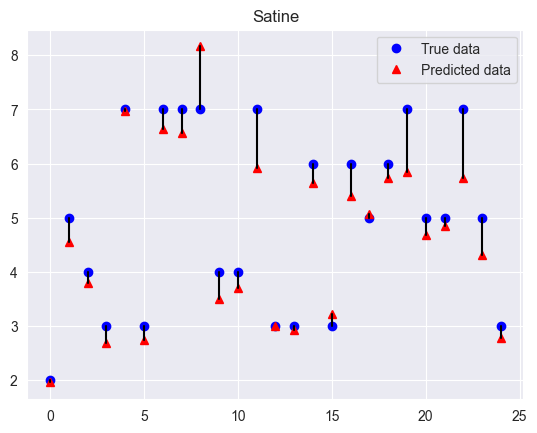

mean squared error: 0.6485548193943937
mean absolute erorr: 0.5308104161764343


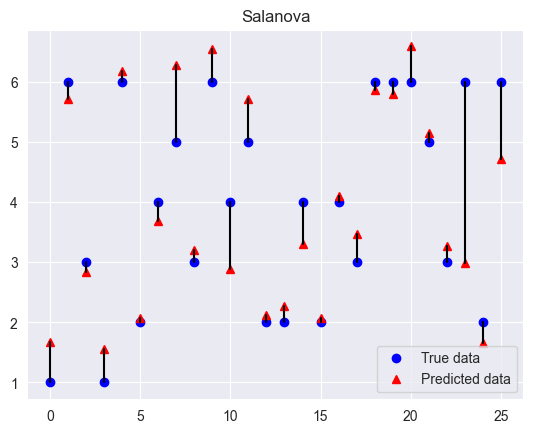

mean squared error: 0.13748726493631738
mean absolute erorr: 0.2965245577659028


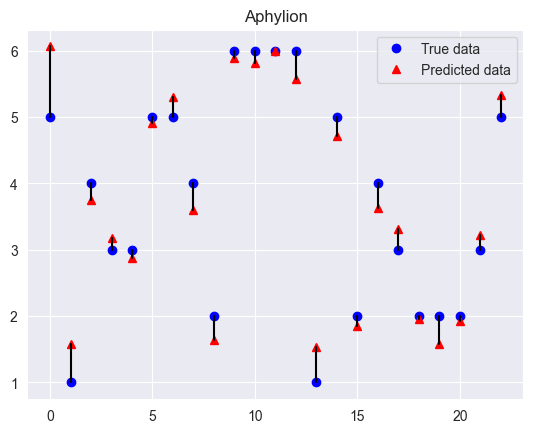

mean squared error: 0.2721015600201488
mean absolute erorr: 0.4083231073169921


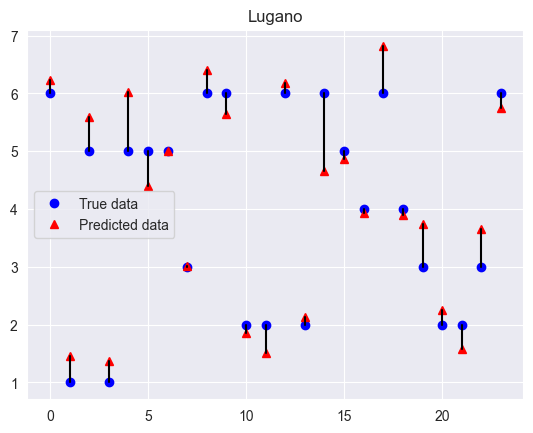

In [12]:
varieties = ["Satine", "Salanova", "Aphylion", "Lugano" ]

for variety in varieties:
    df = prepare_dataframe(data, variety, False)
    X_train, X_test, y_train, y_test = split_data(df, 0.25, True)
    model = create_fit_model(X_train, y_train)
    evaluate_model([mean_squared_error, mean_absolute_error], model, y_test, X_test, variety)
